In [1]:
from pykrx import stock

In [10]:
df = stock.get_index_ohlcv("20220101", "20220113", "1001")

In [22]:
df["시가총액"]

날짜
2022-01-03    2211373367405162
2022-01-04    2212087919930193
2022-01-05    2186715367040906
2022-01-06    2162437324139180
2022-01-07    2187560533655431
2022-01-10    2166763874659561
2022-01-11    2168032047197388
2022-01-12    2200967250234565
2022-01-13    2193799600084399
Name: 시가총액, dtype: object

In [20]:
samsung = stock.get_market_cap("20220101", "20220113", "005930")
samsung

,시가총액,거래량,거래대금,상장주식수
날짜,,,,
2022-01-03,469224908430000,13502112,1066006837750,5969782550
2022-01-04,469821886685000,12427416,977990613000,5969782550
2022-01-05,462061169370000,25470640,1967841509800,5969782550
2022-01-06,459076278095000,12931954,996378432570,5969782550
2022-01-07,467433973665000,15163757,1184236552700,5969782550
2022-01-10,465643038900000,9947422,772740467800,5969782550
2022-01-11,471015843195000,13221123,1038834579600,5969782550
2022-01-12,471015843195000,11000502,868910854000,5969782550
2022-01-13,465046060645000,13876057,1087556384164,5969782550


In [21]:
samsung = stock.get_market_ohlcv("20220101", "20220113", "005930")
samsung

,시가,고가,저가,종가,거래량
날짜,,,,,
2022-01-03,79400,79800,78200,78600,13502112
2022-01-04,78800,79200,78300,78700,12427416
2022-01-05,78800,79000,76400,77400,25470640
2022-01-06,76700,77600,76600,76900,12931954
2022-01-07,78100,78400,77400,78300,15163757
2022-01-10,78100,78100,77100,78000,9947422
2022-01-11,78400,79000,78000,78900,13221123
2022-01-12,79500,79600,78600,78900,11000502
2022-01-13,79300,79300,77900,77900,13605578


In [18]:
stock.get_market_cap("20220101", "20220113", "10001")

""


In [39]:
import pandas as pd

# pandas float print option 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [53]:
from pykrx import stock

In [54]:
KOSPI = "1001"
def get_market_cap_percent(from_date, to_date, code, market=KOSPI):
    index_df = stock.get_index_ohlcv(from_date, to_date, market)
    df = stock.get_market_cap(from_date, to_date, code)
    ohlcv = stock.get_market_ohlcv(from_date, to_date, code)

    # Series str to int
    index_df["시가총액"] = index_df["시가총액"].astype(float)
    df["시가총액"] = df["시가총액"].astype(float)

    percent = df["시가총액"] / index_df["시가총액"] * 100

    ohlcv["시가총액 비중"] = percent
    return ohlcv

In [55]:
SAMSUNG = "005930"

FROM = "20190101"
TO = "20220113"

In [56]:
samsung_ohlcvp = get_market_cap_percent(FROM, TO, SAMSUNG)
samsung_ohlcvp

,시가,고가,저가,종가,거래량,시가총액 비중
날짜,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,17.48
2019-01-03,38300,38550,37450,37600,12471493,17.10
2019-01-04,37450,37600,36850,37450,14108958,16.89
2019-01-07,38000,38900,37800,38750,12748997,17.23
2019-01-08,38000,39200,37950,38100,12756554,17.05
...,...,...,...,...,...,...
2022-01-07,78100,78400,77400,78300,15163757,21.37
2022-01-10,78100,78100,77100,78000,9947422,21.49
2022-01-11,78400,79000,78000,78900,13221123,21.73


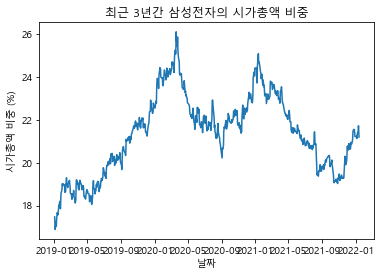

In [65]:
from matplotlib import pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.title("최근 3년간 삼성전자의 시가총액 비중")
plt.xlabel("날짜")
plt.ylabel("시가총액 비중 (%)")


plt.plot(samsung_ohlcvp["시가총액 비중"])



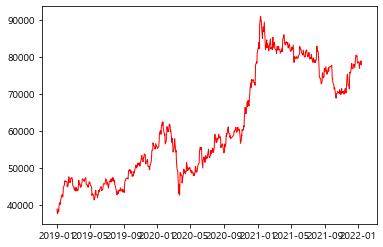

In [68]:
plt.plot(samsung_ohlcvp["종가"], label="종가", color="red", linewidth=1)

In [61]:
samsung_c = stock.get_market_ohlcv(FROM, TO, SAMSUNG)
samsung_c["종가"]

날짜
2019-01-02    38750
2019-01-03    37600
2019-01-04    37450
2019-01-07    38750
2019-01-08    38100
              ...  
2022-01-07    78300
2022-01-10    78000
2022-01-11    78900
2022-01-12    78900
2022-01-13    77900
Name: 종가, Length: 751, dtype: int32